In [53]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

from Siamese.python_classes.training_models import train_dataset, bagging_ensamble_training

In [2]:
curent_dirctory = os.getcwd()
file_directory = "/Archiv/Classical/"
npz_files = [f for f in os.listdir(curent_dirctory + file_directory) if f.endswith('.npz')]
print(npz_files)
print(len(npz_files))

['26_optdigits.npz', '42_WBC.npz', '21_Lymphography.npz', '8_celeba.npz', '33_skin.npz', '34_smtp.npz', '28_pendigits.npz', '39_vertebral.npz', '11_donors.npz', '43_WDBC.npz', '7_Cardiotocography.npz', '36_speech.npz', '5_campaign.npz', '44_Wilt.npz', '10_cover.npz', '46_WPBC.npz', '37_Stamps.npz', '2_annthyroid.npz', '27_PageBlocks.npz', '31_satimage-2.npz', '3_backdoor.npz', '38_thyroid.npz', '29_Pima.npz', '24_mnist.npz', '15_Hepatitis.npz', '22_magic.gamma.npz', '16_http.npz', '32_shuttle.npz', '12_fault.npz', '47_yeast.npz', '13_fraud.npz', '35_SpamBase.npz', '41_Waveform.npz', '17_InternetAds.npz', '6_cardio.npz', '23_mammography.npz', '40_vowels.npz', '9_census.npz', '45_wine.npz', '25_musk.npz', '1_ALOI.npz', '18_Ionosphere.npz', '20_letter.npz', '19_landsat.npz', '14_glass.npz', '30_satellite.npz', '4_breastw.npz']
47


In [3]:
def filter_medium_files(file: str, current_directory: str, file_classic_dataset: str) -> str:
    data: np.lib.npyio.NpzFile = np.load(current_directory + file_classic_dataset + file, allow_pickle = True)
    X: np.ndarray = data['X']

    samples, _ = X.shape
    if (samples >= 100) & (samples <= 15000):
        return file
    
medium_files = [result for f in npz_files if (result := filter_medium_files(f, curent_dirctory, file_directory)) is not None]
print(medium_files)
print(len(medium_files))

['26_optdigits.npz', '42_WBC.npz', '21_Lymphography.npz', '28_pendigits.npz', '39_vertebral.npz', '43_WDBC.npz', '7_Cardiotocography.npz', '36_speech.npz', '44_Wilt.npz', '46_WPBC.npz', '37_Stamps.npz', '2_annthyroid.npz', '27_PageBlocks.npz', '31_satimage-2.npz', '38_thyroid.npz', '29_Pima.npz', '24_mnist.npz', '12_fault.npz', '47_yeast.npz', '35_SpamBase.npz', '41_Waveform.npz', '17_InternetAds.npz', '6_cardio.npz', '23_mammography.npz', '40_vowels.npz', '45_wine.npz', '25_musk.npz', '18_Ionosphere.npz', '20_letter.npz', '19_landsat.npz', '14_glass.npz', '30_satellite.npz', '4_breastw.npz']
33


In [6]:
random_seed = random.randint(0, 100)
print(f'Der Seed ist: {random_seed}')

Der Seed ist: 53


In [8]:
roc_all = []
pr_all = []

counter = 0
for file in medium_files:
    print(f'counter für die Anzhal der Files: {counter}')
    roc, pr = train_dataset(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.05,
                            contrastiv_margin=10.0,
                            lr_siamese=0.0001,
                            lr_classifier=0.001,
                            epochs_siamese=20,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            )
    
    roc_all.append(roc)
    pr_all.append(pr)
    counter += 1

counter für die Anzhal der Files: 0
##############Start Training with Dataset 26_optdigits.npz######################
Die gesamte Länge der Daten ist 5216
Die Länge das Anomalydatensatzen ist 150 und der normalen daten ist: 5066
Es werden 5.0% der Daten gelabeld
Es wurden zwei Datensätze erstellt, der erste mit der beiden Längen 7 und 253
Die ungelabelden parts dazu sind 143 und 4813
Der Siamese Datasatz wurde mit einer gesamtLänge von 65829 erstellt
Die länge des ungelabendeten Datensatzen ist: 4956
Die länge des ungelabendeten Datenloader ist: 20
Das ist die verwendete loss<function binary_cross_entropy at 0x12fd5bc40>
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 226.2536748102469
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 143.35698931346568
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 64.21258643246436
----------------Start trainign Epoche 3----------------
Epoche: 3 Average Los

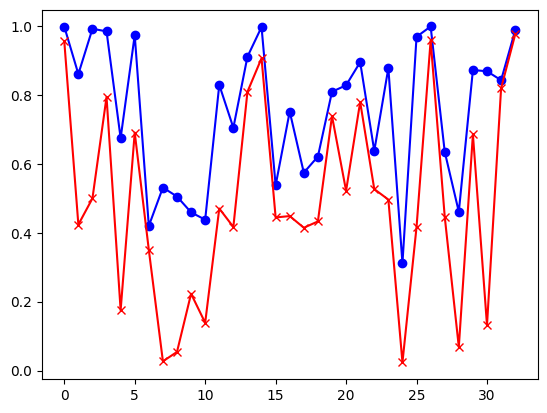

In [9]:
plt.plot(range(len(roc_all)), roc_all, marker='o', color='b')
plt.plot(range(len(pr_all)), pr_all, marker='x', color='r')
plt.show()

In [11]:
print(f'Mean Roc Curve: {np.mean(roc_all)}')
print(f'Mean PR Curve: {np.mean(pr_all)}')

Mean Roc Curve: 0.7506456943521186
Mean PR Curve: 0.49309409094810336


In [15]:
random_seeds = [random.randint(0, 100) for _ in range(3)]

In [18]:
roc_all = []
pr_all = []
for random_seed in random_seeds:
    print(f'Random Seed: {random_seed}')
    counter = 0
    for file in medium_files:
        print(f'counter für die Anzhal der Files: {counter}')
        roc, pr = train_dataset(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.05,
                            contrastiv_margin=10.0,
                            lr_siamese=0.0001,
                            lr_classifier=0.001,
                            epochs_siamese=20,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            )
    
        roc_all.append(roc)
        pr_all.append(pr)
        counter += 1

Random Seed: 78
counter für die Anzhal der Files: 0
##############Start Training with Dataset 26_optdigits.npz######################
Die gesamte Länge der Daten ist 5216
Die Länge das Anomalydatensatzen ist 150 und der normalen daten ist: 5066
Es werden 5.0% der Daten gelabeld
Es wurden zwei Datensätze erstellt, der erste mit der beiden Längen 7 und 253
Die ungelabelden parts dazu sind 143 und 4813
Der Siamese Datasatz wurde mit einer gesamtLänge von 65829 erstellt
Die länge des ungelabendeten Datensatzen ist: 4956
Die länge des ungelabendeten Datenloader ist: 20
Das ist die verwendete loss<function binary_cross_entropy at 0x12fd5bc40>
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 238.67010048563165
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 175.30450785437296
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 117.17221277813579
----------------Start trainign Epoche 3----------------
Epo

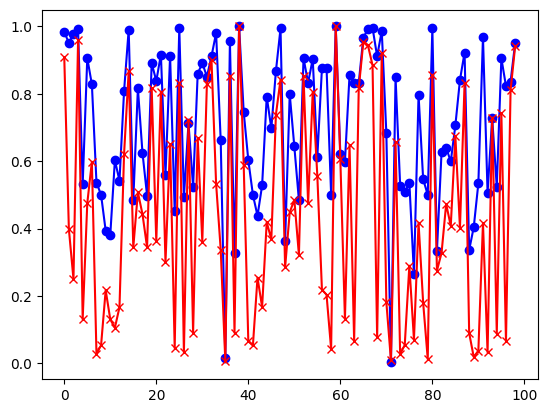

In [19]:
plt.plot(range(len(roc_all)), roc_all, marker='o', color='b')
plt.plot(range(len(pr_all)), pr_all, marker='x', color='r')
plt.show()

In [20]:
print(f'Mean Roc Curve: {np.mean(roc_all)}')
print(f'Mean PR Curve: {np.mean(pr_all)}')

Mean Roc Curve: 0.707640277246202
Mean PR Curve: 0.43578947019988173


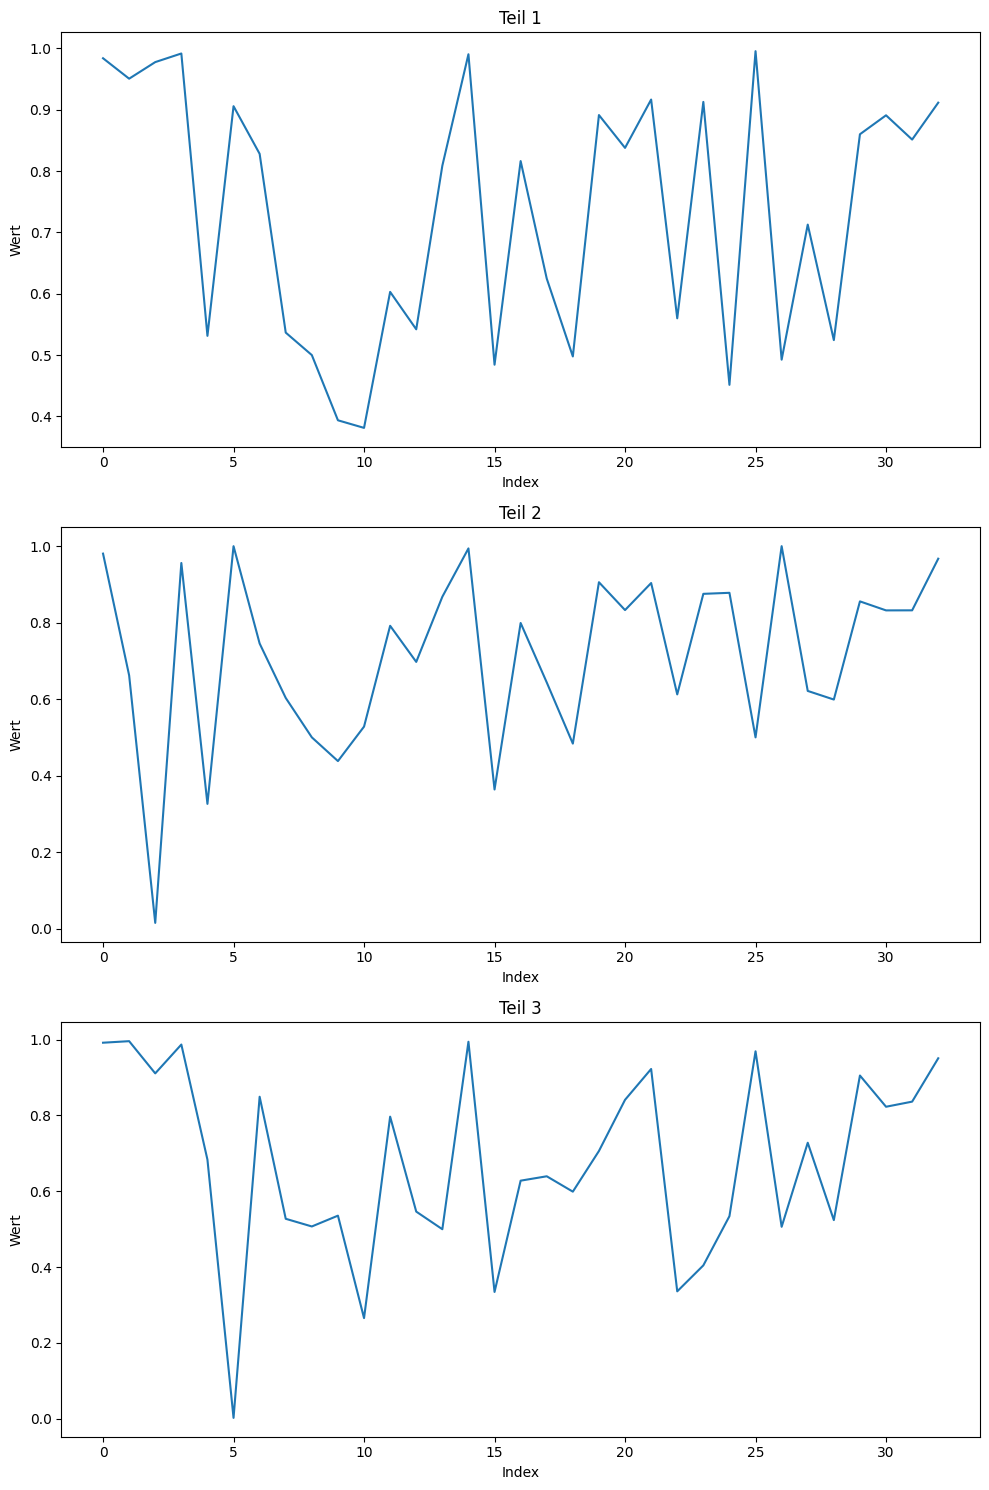

In [22]:
# Aufteilen der Liste in drei Teile mit jeweils 33 Elementen
part1 = roc_all[:33]
part2 = roc_all[33:66]
part3 = roc_all[66:]

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot für den ersten Teil
axes[0].plot(part1)
axes[0].set_title('Teil 1')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Wert')

# Plot für den zweiten Teil
axes[1].plot(part2)
axes[1].set_title('Teil 2')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Wert')

# Plot für den dritten Teil
axes[2].plot(part3)
axes[2].set_title('Teil 3')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Wert')

# Layout anpassen
plt.tight_layout()

# Plots anzeigen
plt.show()

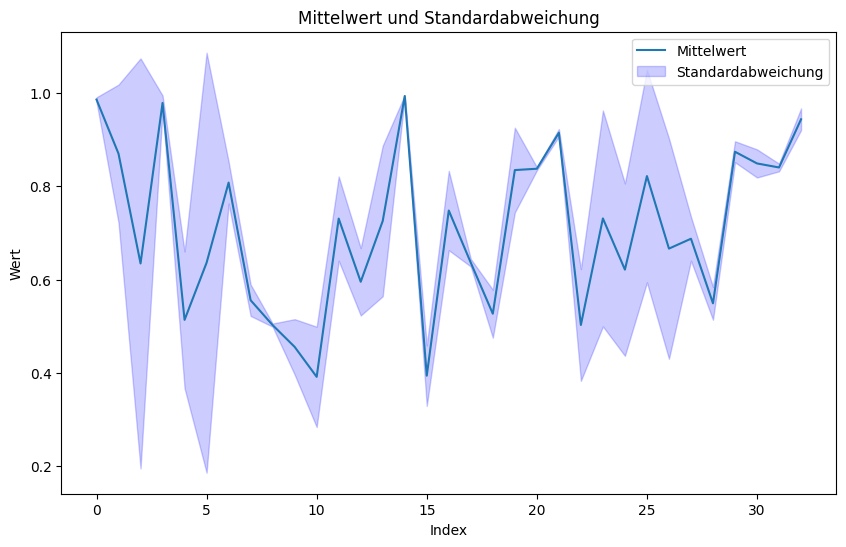

In [23]:
# Aufteilen der Liste in drei Teile mit jeweils 33 Elementen
part1 = roc_all[:33]
part2 = roc_all[33:66]
part3 = roc_all[66:]

# Konvertieren in NumPy-Arrays für einfachere Berechnungen
part1 = np.array(part1)
part2 = np.array(part2)
part3 = np.array(part3)

# Berechnung des Mittelwerts und der Standardabweichung
mean_values = np.mean([part1, part2, part3], axis=0)
std_values = np.std([part1, part2, part3], axis=0)

# Erstellen des Plots
plt.figure(figsize=(10, 6))

# Plotten des Mittelwerts
plt.plot(mean_values, label='Mittelwert')

# Schattierter Bereich für die Standardabweichung
plt.fill_between(range(len(mean_values)), mean_values - std_values, mean_values + std_values, color='b', alpha=0.2, label='Standardabweichung')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Mittelwert und Standardabweichung')
plt.xlabel('Index')
plt.ylabel('Wert')
plt.legend()

# Plot anzeigen
plt.show()

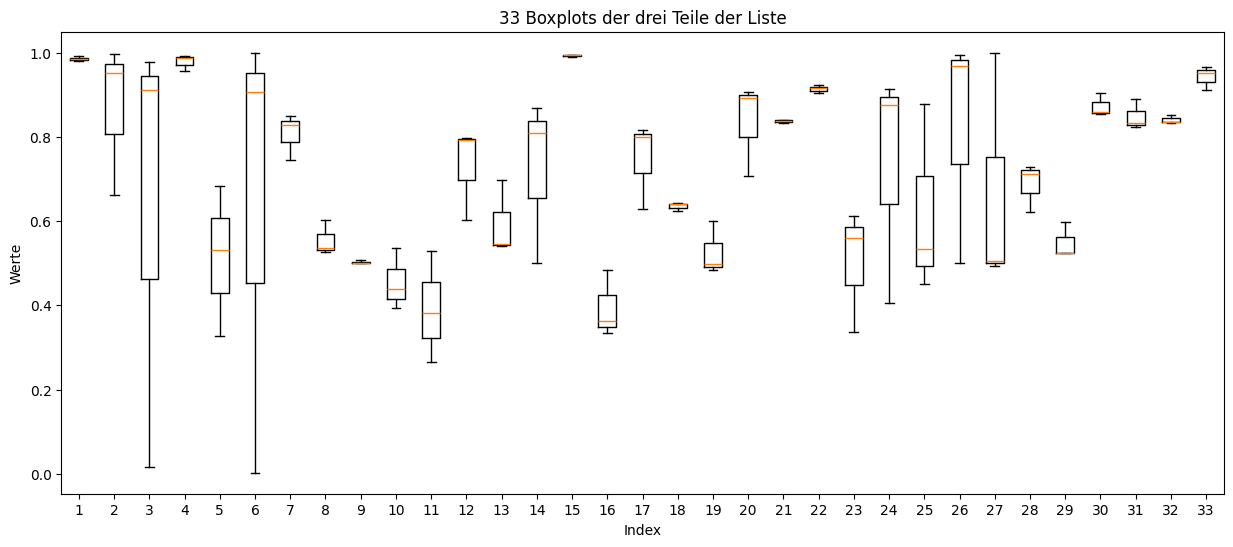

In [25]:
part1 = roc_all[:33]
part2 = roc_all[33:66]
part3 = roc_all[66:]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([part1, part2, part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

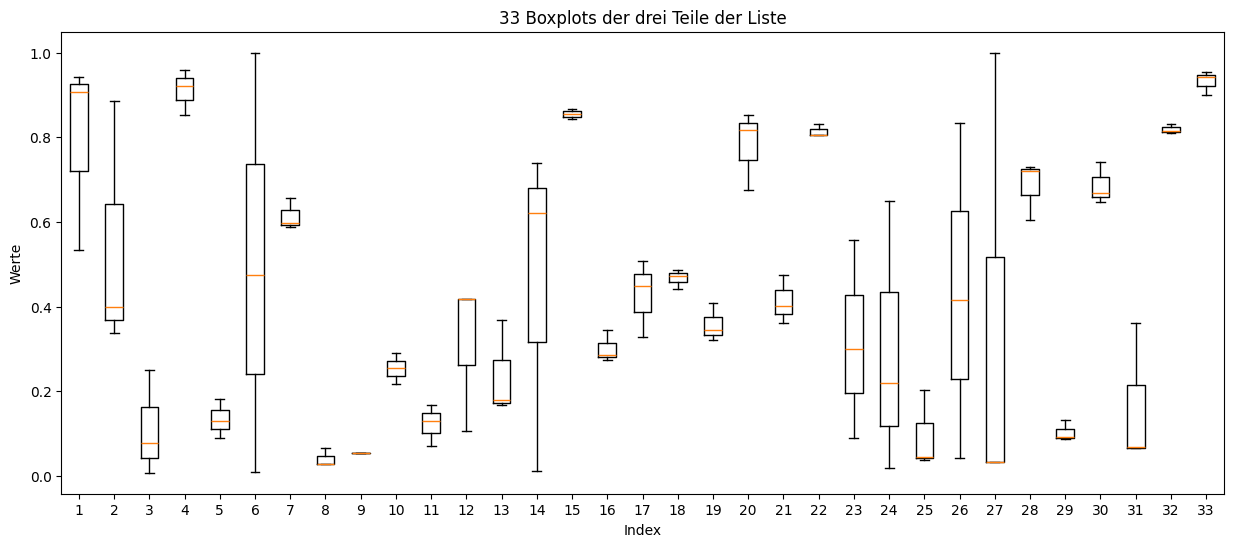

In [26]:
part1 = pr_all[:33]
part2 = pr_all[33:66]
part3 = pr_all[66:]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([part1, part2, part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

In [27]:
roc_all_10_percent = []
pr_all_10_percent = []
for random_seed in random_seeds:
    print(f'Random Seed: {random_seed}')
    counter = 0
    for file in medium_files:
        print(f'counter für die Anzhal der Files: {counter}')
        roc, pr = train_dataset(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.1,
                            contrastiv_margin=10.0,
                            lr_siamese=0.0001,
                            lr_classifier=0.001,
                            epochs_siamese=20,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            )
    
        roc_all_10_percent.append(roc)
        pr_all_10_percent.append(pr)
        counter += 1

Random Seed: 78
counter für die Anzhal der Files: 0
##############Start Training with Dataset 26_optdigits.npz######################
Die gesamte Länge der Daten ist 5216
Die Länge das Anomalydatensatzen ist 150 und der normalen daten ist: 5066
Es werden 10.0% der Daten gelabeld
Es wurden zwei Datensätze erstellt, der erste mit der beiden Längen 15 und 506
Die ungelabelden parts dazu sind 135 und 4560
Der Siamese Datasatz wurde mit einer gesamtLänge von 263851 erstellt
Die länge des ungelabendeten Datensatzen ist: 4695
Die länge des ungelabendeten Datenloader ist: 19
Das ist die verwendete loss<function binary_cross_entropy at 0x12fd5bc40>
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 155.34344539771834
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 18.070053854691647
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 4.712084762166705
----------------Start trainign Epoche 3----------------
E

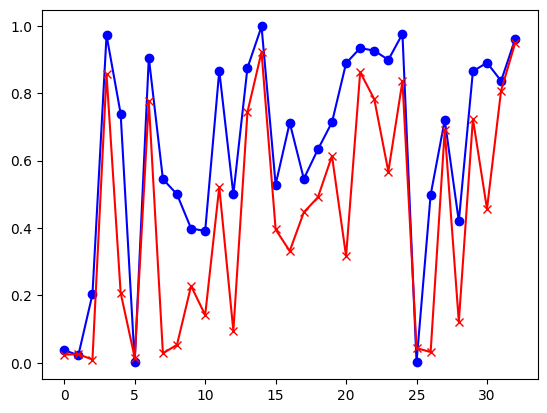

In [44]:
plt.plot(range(len(roc_all_10_percent[:33])), roc_all_10_percent[:33], marker='o', color='b')
plt.plot(range(len(pr_all_10_percent[:33])), pr_all_10_percent[:33], marker='x', color='r')
plt.show()

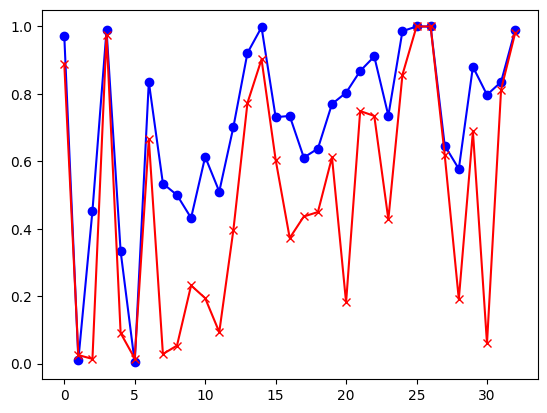

In [45]:
plt.plot(range(len(roc_all_10_percent[33:66])), roc_all_10_percent[33:66], marker='o', color='b')
plt.plot(range(len(pr_all_10_percent[33:66])), pr_all_10_percent[33:66], marker='x', color='r')
plt.show()

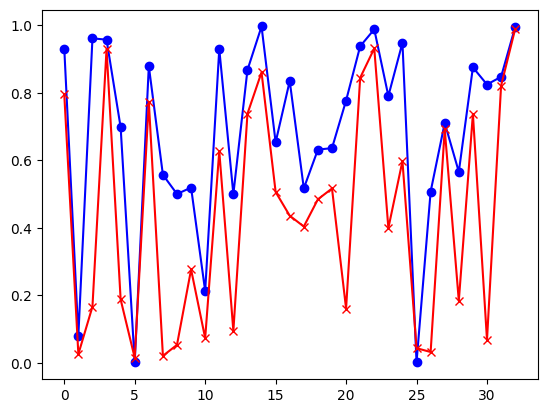

In [46]:
plt.plot(range(len(roc_all_10_percent[66:])), roc_all_10_percent[66:], marker='o', color='b')
plt.plot(range(len(pr_all_10_percent[66:])), pr_all_10_percent[66:], marker='x', color='r')
plt.show()

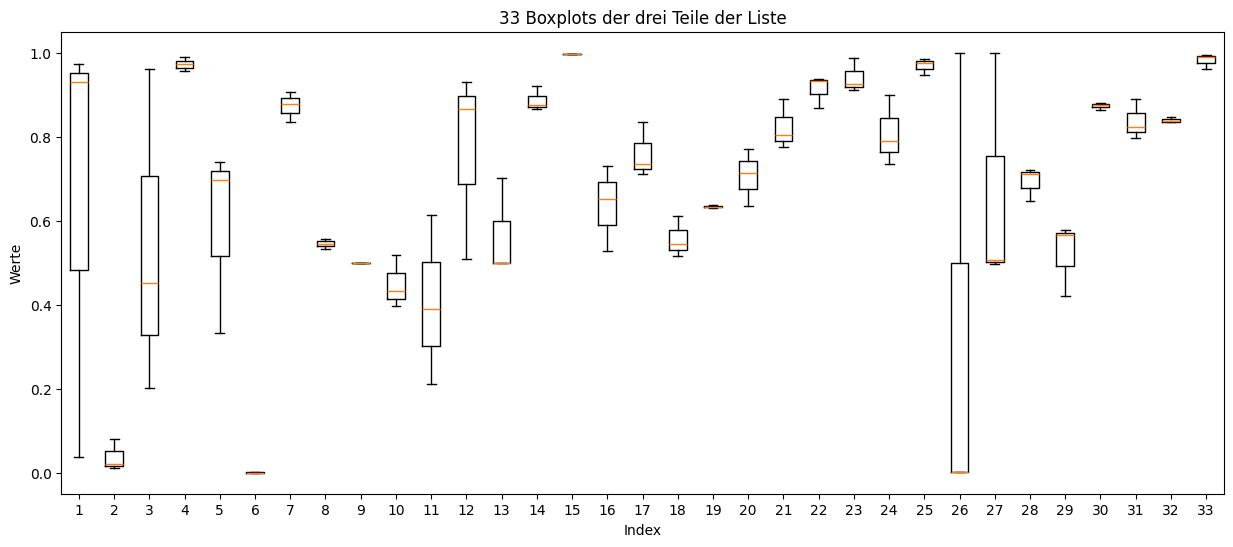

In [28]:
part1 = roc_all_10_percent[:33]
part2 = roc_all_10_percent[33:66]
part3 = roc_all_10_percent[66:]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([part1, part2, part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

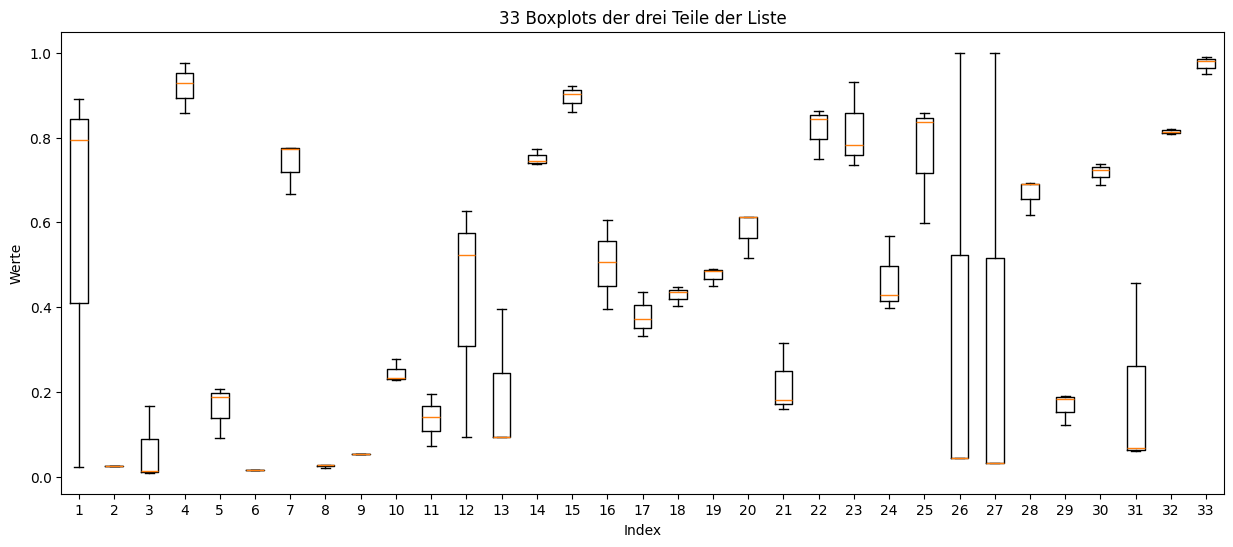

In [29]:
part1 = pr_all_10_percent[:33]
part2 = pr_all_10_percent[33:66]
part3 = pr_all_10_percent[66:]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([part1, part2, part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

In [30]:
def filter_small_files(file: str, current_directory: str, file_classic_dataset: str) -> str:
    data: np.lib.npyio.NpzFile = np.load(current_directory + file_classic_dataset + file, allow_pickle = True)
    X: np.ndarray = data['X']

    samples, _ = X.shape
    if samples < 1000:
        return file
    
small_files = [result for f in npz_files if (result := filter_small_files(f, curent_dirctory, file_directory)) is not None]
print(small_files)
print(len(small_files))


['42_WBC.npz', '21_Lymphography.npz', '39_vertebral.npz', '43_WDBC.npz', '46_WPBC.npz', '37_Stamps.npz', '29_Pima.npz', '15_Hepatitis.npz', '45_wine.npz', '18_Ionosphere.npz', '14_glass.npz', '4_breastw.npz']
12


In [33]:
indices_in_medium = [i for i, val in enumerate(medium_files) if val in small_files]
indices_not_in_medium = [i for i, val in enumerate(medium_files) if val not in small_files]
print(indices_in_medium)
print(indices_not_in_medium)

[1, 2, 4, 5, 9, 10, 15, 25, 27, 30, 32]
[0, 3, 6, 7, 8, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 31]


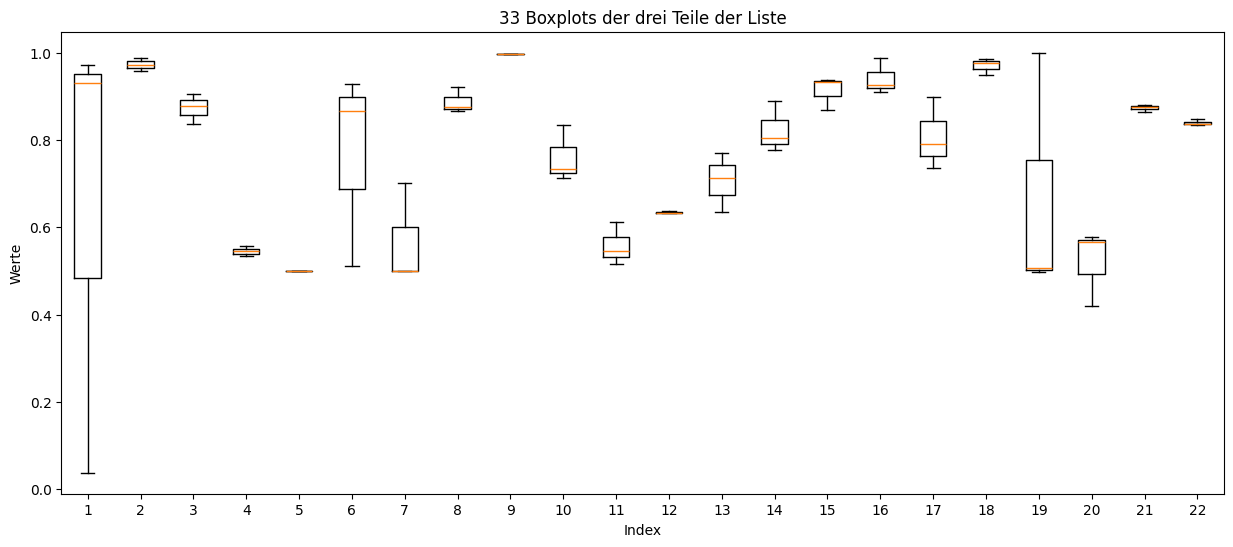

In [34]:
part1 = roc_all_10_percent[:33]
part2 = roc_all_10_percent[33:66]
part3 = roc_all_10_percent[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_not_in_medium]
meadium_data_part2 = [part2[i] for i in indices_not_in_medium]
meadium_data_part3 = [part3[i] for i in indices_not_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

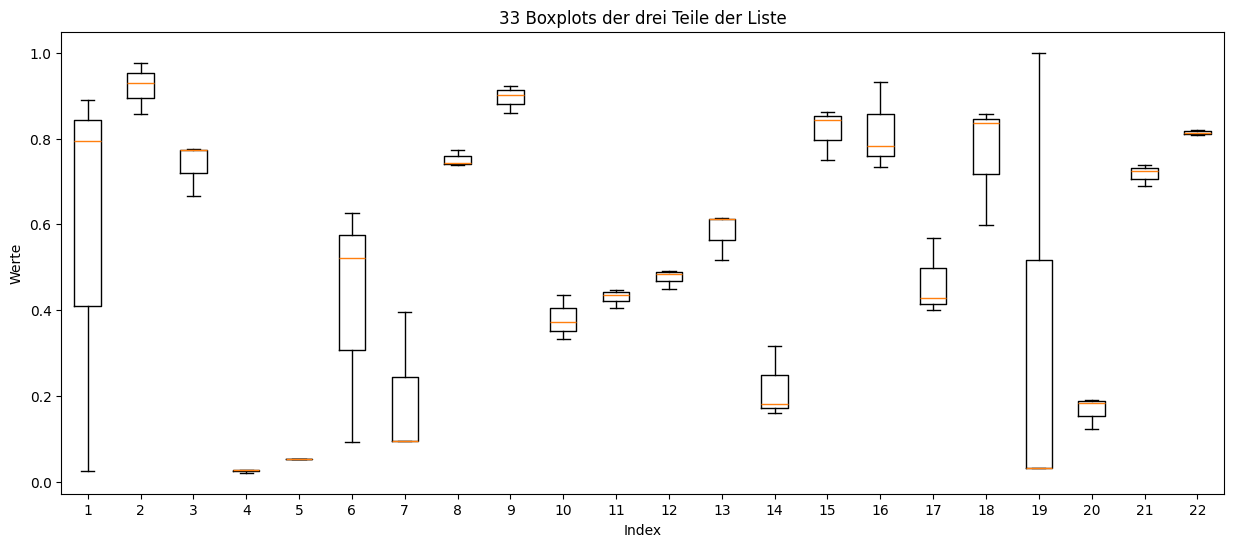

In [35]:
part1 = pr_all_10_percent[:33]
part2 = pr_all_10_percent[33:66]
part3 = pr_all_10_percent[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_not_in_medium]
meadium_data_part2 = [part2[i] for i in indices_not_in_medium]
meadium_data_part3 = [part3[i] for i in indices_not_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

## Hier die Daten mit 5 % gelabeldten Daten

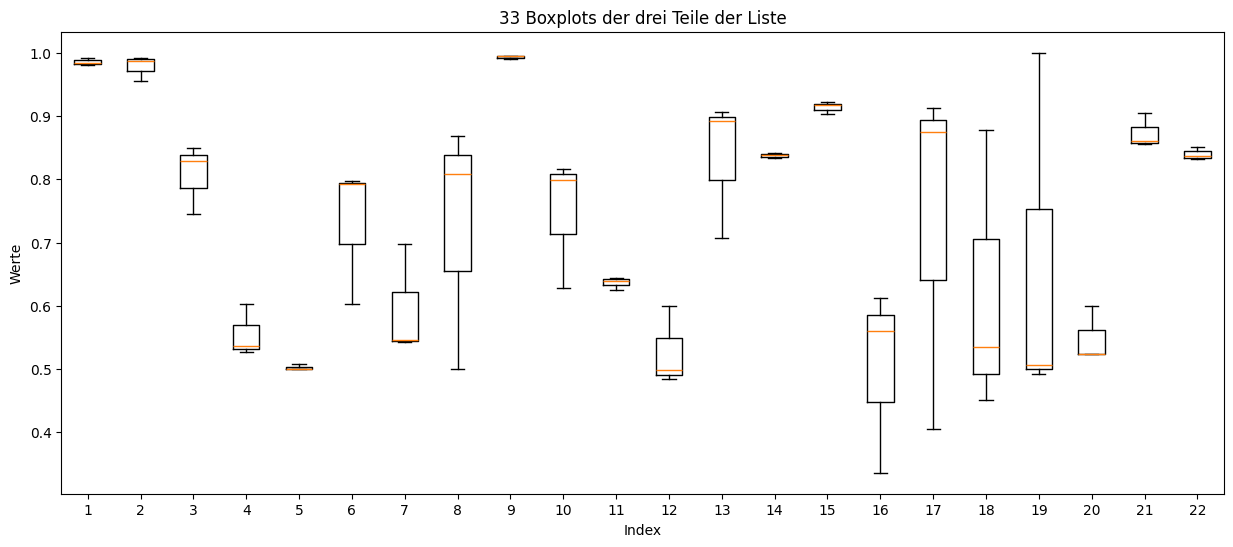

In [36]:
part1 = roc_all[:33]
part2 = roc_all[33:66]
part3 = roc_all[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_not_in_medium]
meadium_data_part2 = [part2[i] for i in indices_not_in_medium]
meadium_data_part3 = [part3[i] for i in indices_not_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

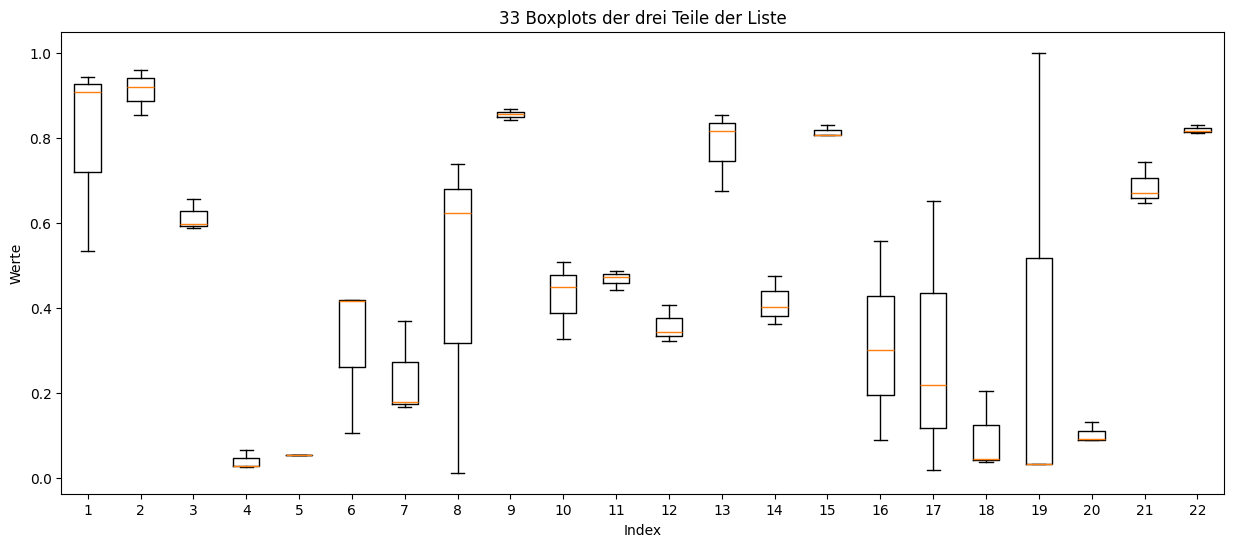

In [37]:
part1 = pr_all[:33]
part2 = pr_all[33:66]
part3 = pr_all[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_not_in_medium]
meadium_data_part2 = [part2[i] for i in indices_not_in_medium]
meadium_data_part3 = [part3[i] for i in indices_not_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

## Gleichen plots mit den Daten die weger als 1000 Examples haben

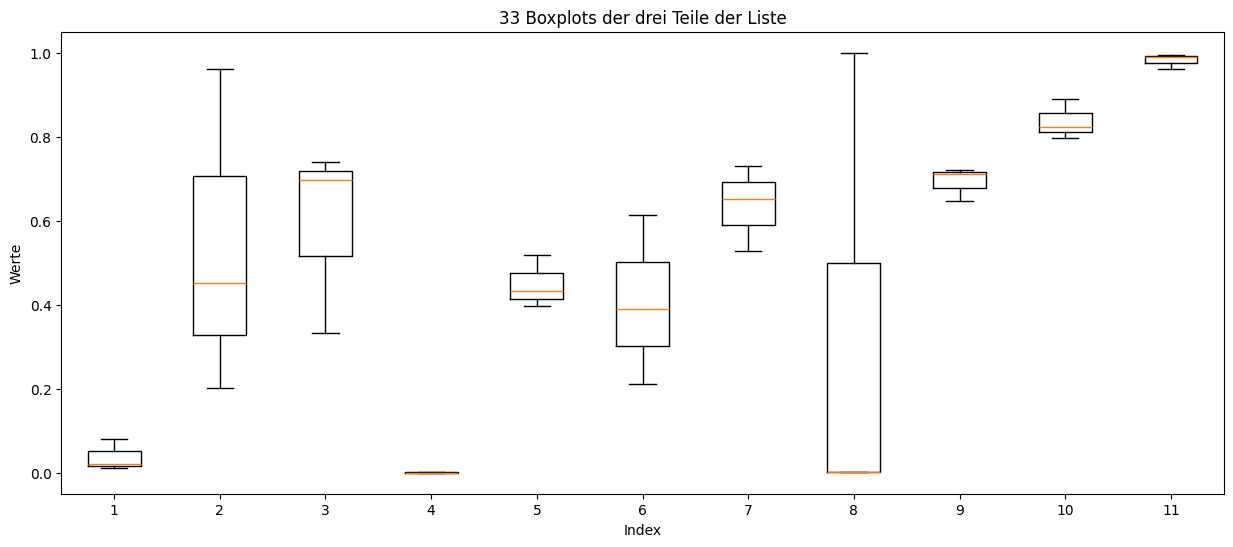

In [38]:
part1 = roc_all_10_percent[:33]
part2 = roc_all_10_percent[33:66]
part3 = roc_all_10_percent[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_in_medium]
meadium_data_part2 = [part2[i] for i in indices_in_medium]
meadium_data_part3 = [part3[i] for i in indices_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

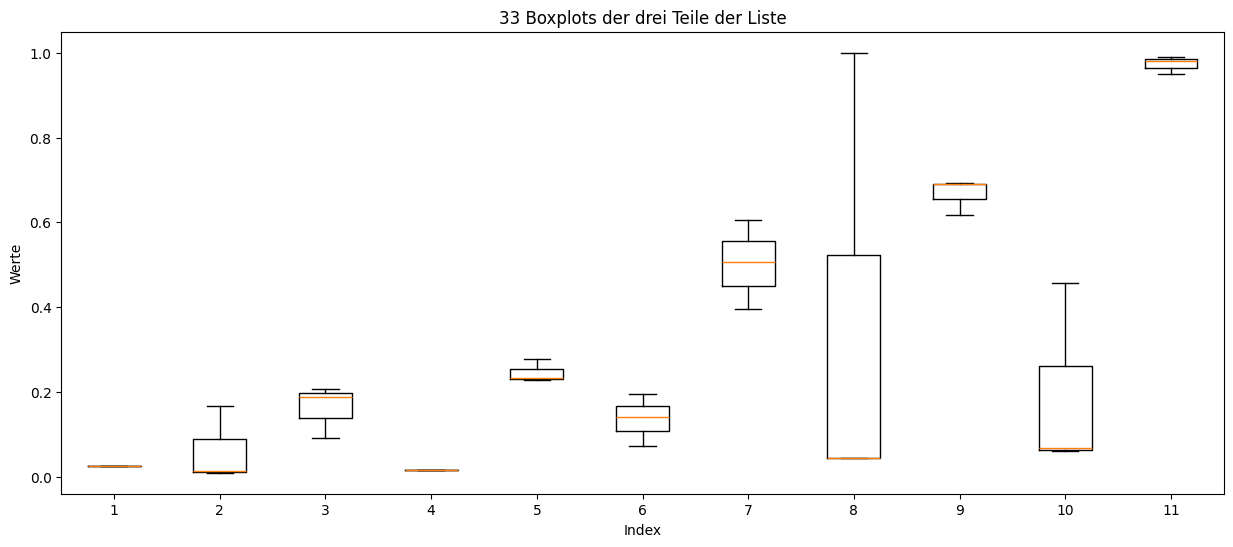

In [39]:
part1 = pr_all_10_percent[:33]
part2 = pr_all_10_percent[33:66]
part3 = pr_all_10_percent[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_in_medium]
meadium_data_part2 = [part2[i] for i in indices_in_medium]
meadium_data_part3 = [part3[i] for i in indices_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

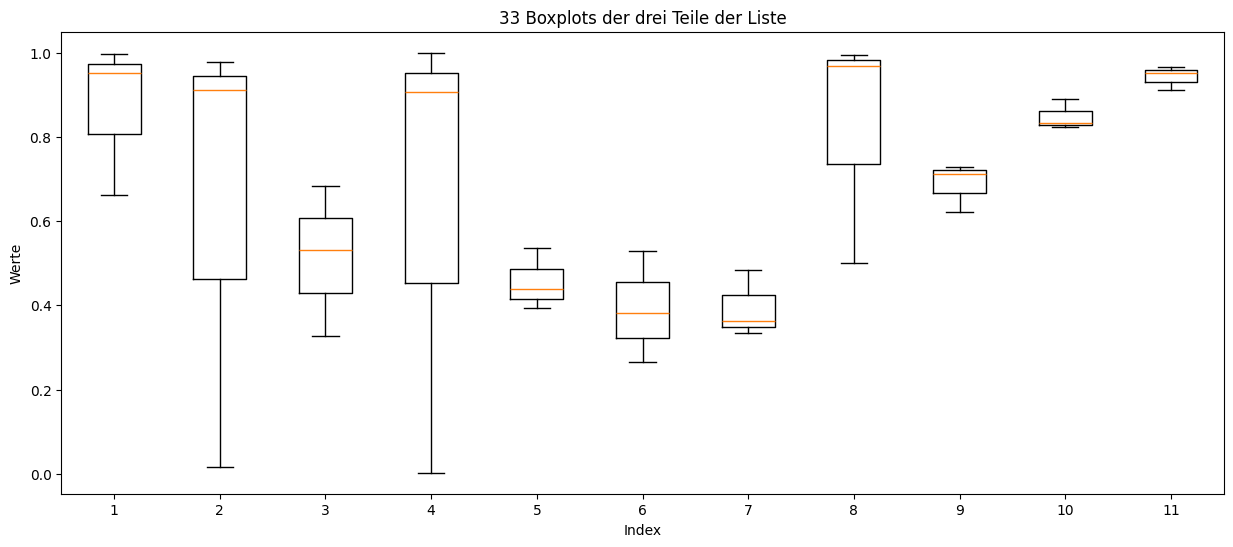

In [40]:
part1 = roc_all[:33]
part2 = roc_all[33:66]
part3 = roc_all[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_in_medium]
meadium_data_part2 = [part2[i] for i in indices_in_medium]
meadium_data_part3 = [part3[i] for i in indices_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

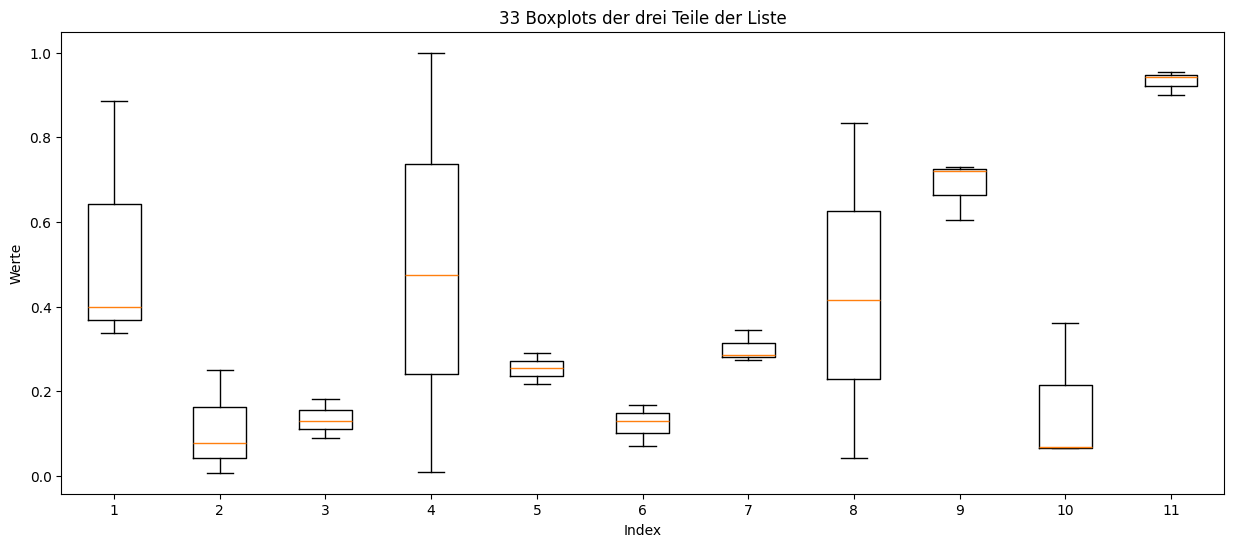

In [41]:
part1 = pr_all[:33]
part2 = pr_all[33:66]
part3 = pr_all[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_in_medium]
meadium_data_part2 = [part2[i] for i in indices_in_medium]
meadium_data_part3 = [part3[i] for i in indices_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

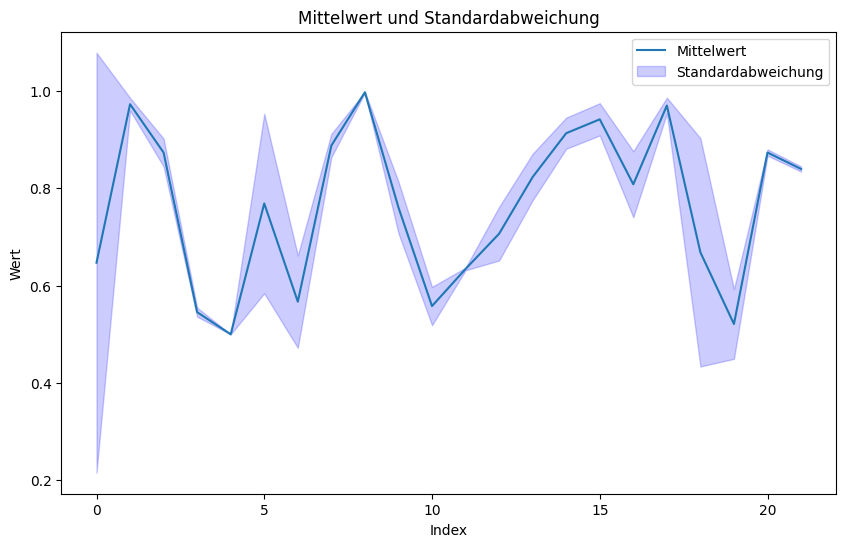

In [42]:
# Aufteilen der Liste in drei Teile mit jeweils 33 Elementen
part1 = roc_all_10_percent[:33]
part2 = roc_all_10_percent[33:66]
part3 = roc_all_10_percent[66:]

meadium_data_part1 = [part1[i] for i in indices_not_in_medium]
meadium_data_part2 = [part2[i] for i in indices_not_in_medium]
meadium_data_part3 = [part3[i] for i in indices_not_in_medium]

# Konvertieren in NumPy-Arrays für einfachere Berechnungen
meadium_data_part1 = np.array(meadium_data_part1)
meadium_data_part2 = np.array(meadium_data_part2)
meadium_data_part3 = np.array(meadium_data_part3)

# Berechnung des Mittelwerts und der Standardabweichung
mean_values = np.mean([meadium_data_part1, meadium_data_part2, meadium_data_part3], axis=0)
std_values = np.std([meadium_data_part1, meadium_data_part2, meadium_data_part3], axis=0)

# Erstellen des Plots
plt.figure(figsize=(10, 6))

# Plotten des Mittelwerts
plt.plot(mean_values, label='Mittelwert')

# Schattierter Bereich für die Standardabweichung
plt.fill_between(range(len(mean_values)), mean_values - std_values, mean_values + std_values, color='b', alpha=0.2, label='Standardabweichung')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Mittelwert und Standardabweichung')
plt.xlabel('Index')
plt.ylabel('Wert')
plt.legend()

# Plot anzeigen
plt.show()

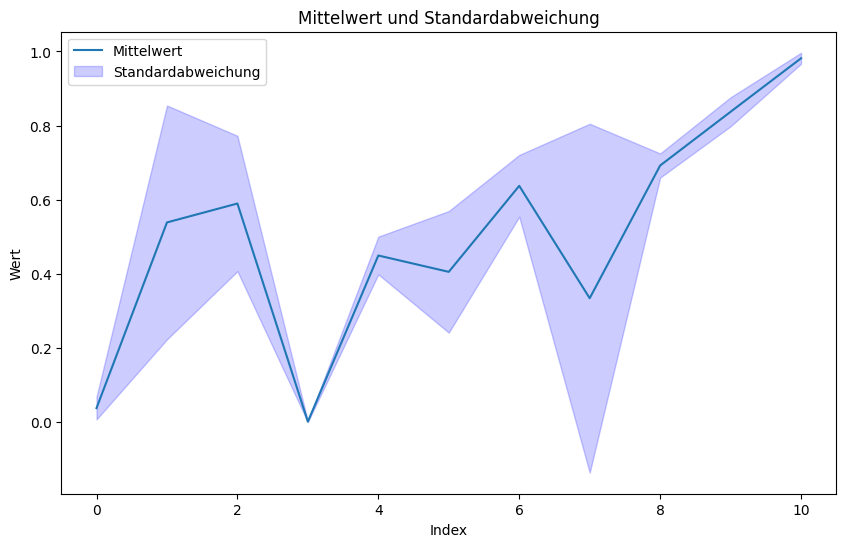

In [43]:
# Aufteilen der Liste in drei Teile mit jeweils 33 Elementen
part1 = roc_all_10_percent[:33]
part2 = roc_all_10_percent[33:66]
part3 = roc_all_10_percent[66:]

meadium_data_part1 = [part1[i] for i in indices_in_medium]
meadium_data_part2 = [part2[i] for i in indices_in_medium]
meadium_data_part3 = [part3[i] for i in indices_in_medium]

# Konvertieren in NumPy-Arrays für einfachere Berechnungen
meadium_data_part1 = np.array(meadium_data_part1)
meadium_data_part2 = np.array(meadium_data_part2)
meadium_data_part3 = np.array(meadium_data_part3)

# Berechnung des Mittelwerts und der Standardabweichung
mean_values = np.mean([meadium_data_part1, meadium_data_part2, meadium_data_part3], axis=0)
std_values = np.std([meadium_data_part1, meadium_data_part2, meadium_data_part3], axis=0)

# Erstellen des Plots
plt.figure(figsize=(10, 6))

# Plotten des Mittelwerts
plt.plot(mean_values, label='Mittelwert')

# Schattierter Bereich für die Standardabweichung
plt.fill_between(range(len(mean_values)), mean_values - std_values, mean_values + std_values, color='b', alpha=0.2, label='Standardabweichung')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Mittelwert und Standardabweichung')
plt.xlabel('Index')
plt.ylabel('Wert')
plt.legend()

# Plot anzeigen
plt.show()

In [47]:
roc_all_lower_lr = []
pr_all_lower_lr = []
for random_seed in random_seeds:
    print(f'Random Seed: {random_seed}')
    counter = 0
    for file in medium_files:
        print(f'counter für die Anzhal der Files: {counter}')
        roc, pr = train_dataset(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.05,
                            contrastiv_margin=10.0,
                            lr_siamese=0.00001,
                            lr_classifier=0.0001,
                            epochs_siamese=30,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            )
    
        roc_all_lower_lr.append(roc)
        pr_all_lower_lr.append(pr)
        counter += 1

Random Seed: 78
counter für die Anzhal der Files: 0
##############Start Training with Dataset 26_optdigits.npz######################
Die gesamte Länge der Daten ist 5216
Die Länge das Anomalydatensatzen ist 150 und der normalen daten ist: 5066
Es werden 5.0% der Daten gelabeld
Es wurden zwei Datensätze erstellt, der erste mit der beiden Längen 7 und 253
Die ungelabelden parts dazu sind 143 und 4813
Der Siamese Datasatz wurde mit einer gesamtLänge von 65829 erstellt
Die länge des ungelabendeten Datensatzen ist: 4956
Die länge des ungelabendeten Datenloader ist: 20
Das ist die verwendete loss<function binary_cross_entropy at 0x12fd5bc40>
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 268.56715765664745
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 259.05391160831897
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 249.47711974890657
----------------Start trainign Epoche 3----------------
Epo

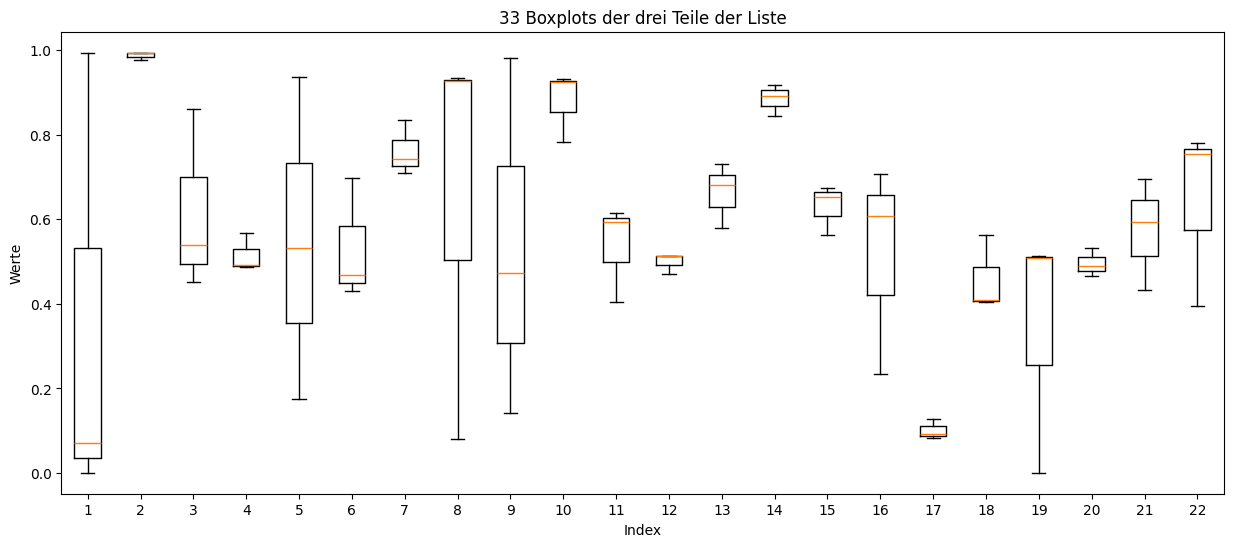

In [48]:
part1 = roc_all_lower_lr[:33]
part2 = roc_all_lower_lr[33:66]
part3 = roc_all_lower_lr[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_not_in_medium]
meadium_data_part2 = [part2[i] for i in indices_not_in_medium]
meadium_data_part3 = [part3[i] for i in indices_not_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

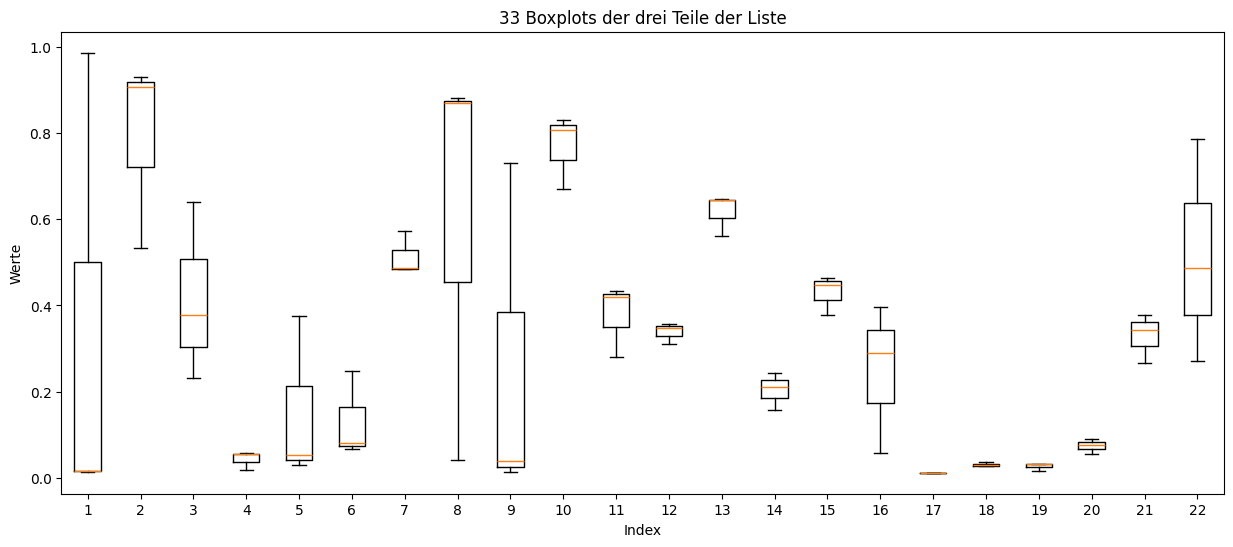

In [49]:
part1 = pr_all_lower_lr[:33]
part2 = pr_all_lower_lr[33:66]
part3 = pr_all_lower_lr[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_not_in_medium]
meadium_data_part2 = [part2[i] for i in indices_not_in_medium]
meadium_data_part3 = [part3[i] for i in indices_not_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

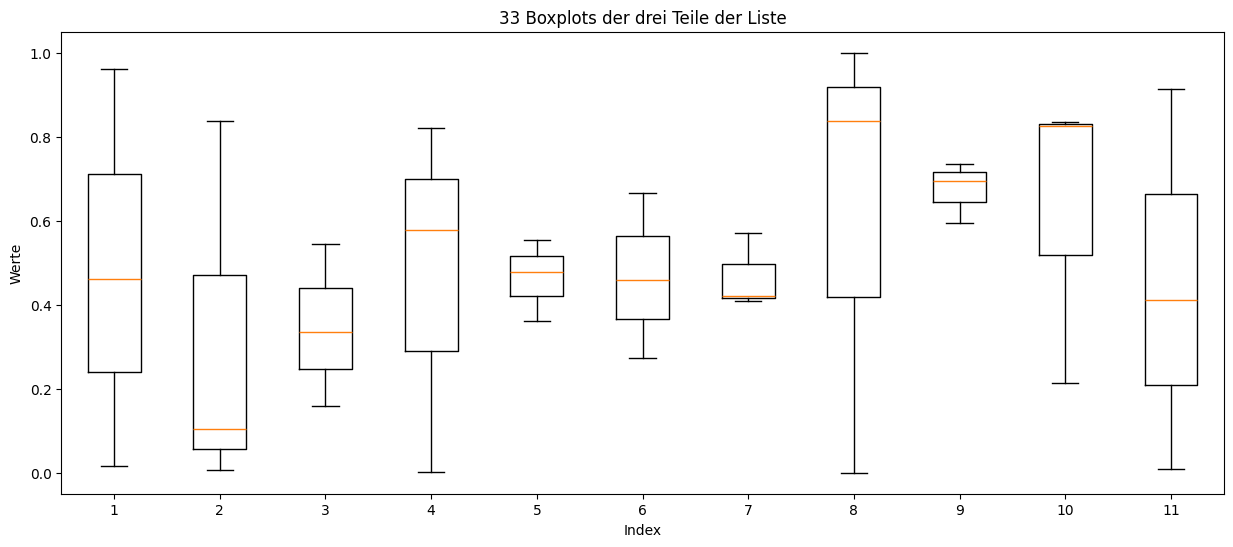

In [51]:
part1 = roc_all_lower_lr[:33]
part2 = roc_all_lower_lr[33:66]
part3 = roc_all_lower_lr[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_in_medium]
meadium_data_part2 = [part2[i] for i in indices_in_medium]
meadium_data_part3 = [part3[i] for i in indices_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

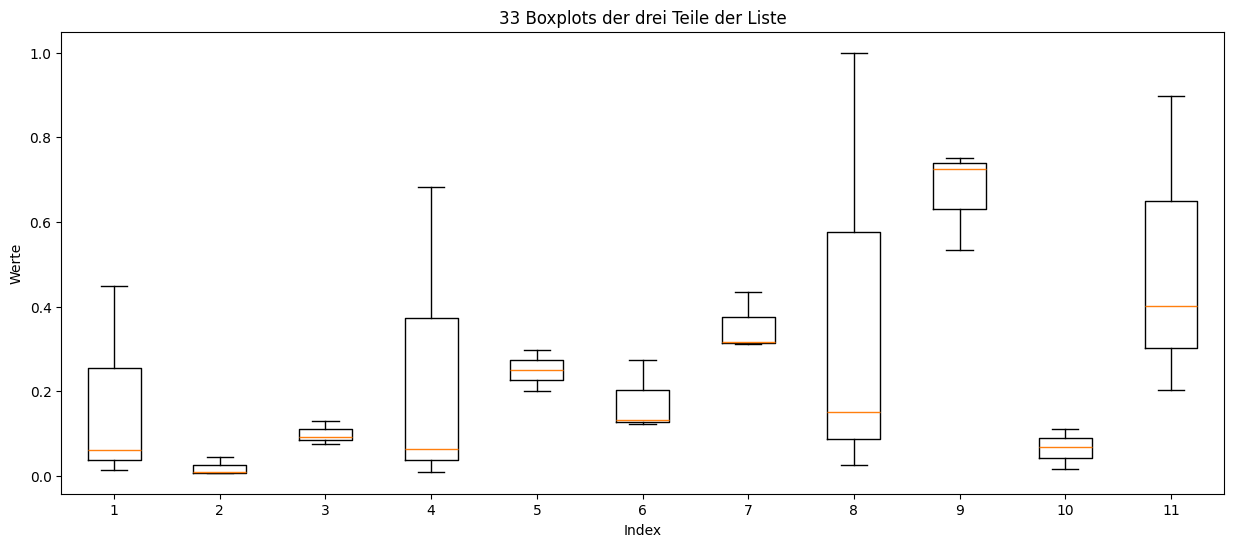

In [52]:
part1 = pr_all_lower_lr[:33]
part2 = pr_all_lower_lr[33:66]
part3 = pr_all_lower_lr[66:]

#filtered_data
meadium_data_part1 = [part1[i] for i in indices_in_medium]
meadium_data_part2 = [part2[i] for i in indices_in_medium]
meadium_data_part3 = [part3[i] for i in indices_in_medium]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([meadium_data_part1, meadium_data_part2, meadium_data_part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

In [54]:
roc_all_ensamble = []
pr_all_ensamble = []
for random_seed in random_seeds:
    print(f'Random Seed: {random_seed}')
    counter = 0
    for file in medium_files:
        print(f'counter für die Anzhal der Files: {counter}')
        roc, pr = bagging_ensamble_training(file, 
                            random_seed=random_seed,
                            percentage_labeld=0.05,
                            contrastiv_margin=10.0,
                            lr_siamese=0.0001,
                            lr_classifier=0.001,
                            epochs_siamese=20,
                            epochs_classifier=40,
                            print_embeddeds=False,
                            print_learning=False,
                            len_dataset=100000,
                            )
    
        roc_all_ensamble.append(roc)
        pr_all_ensamble.append(pr)
        counter += 1

Random Seed: 78
counter für die Anzhal der Files: 0
##############Start Training with Dataset 26_optdigits.npz######################
----------------Start trainign Epoche 1 Siamese ----------------
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 3172.9006129116046
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 2452.0249179537645
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 1498.0665715600524
----------------Start trainign Epoche 3----------------
Epoche: 3 Average Loss: 808.3165781162584
----------------Start trainign Epoche 4----------------
Epoche: 4 Average Loss: 608.4629529870075
----------------Start trainign Epoche 5----------------
Epoche: 5 Average Loss: 636.0715467838376
----------------Start trainign Epoche 6----------------
Epoche: 6 Average Loss: 692.6899506942085
----------------Start trainign Epoche 7----------------
Epoche: 7 Average Loss: 723.7537572524127
---------------

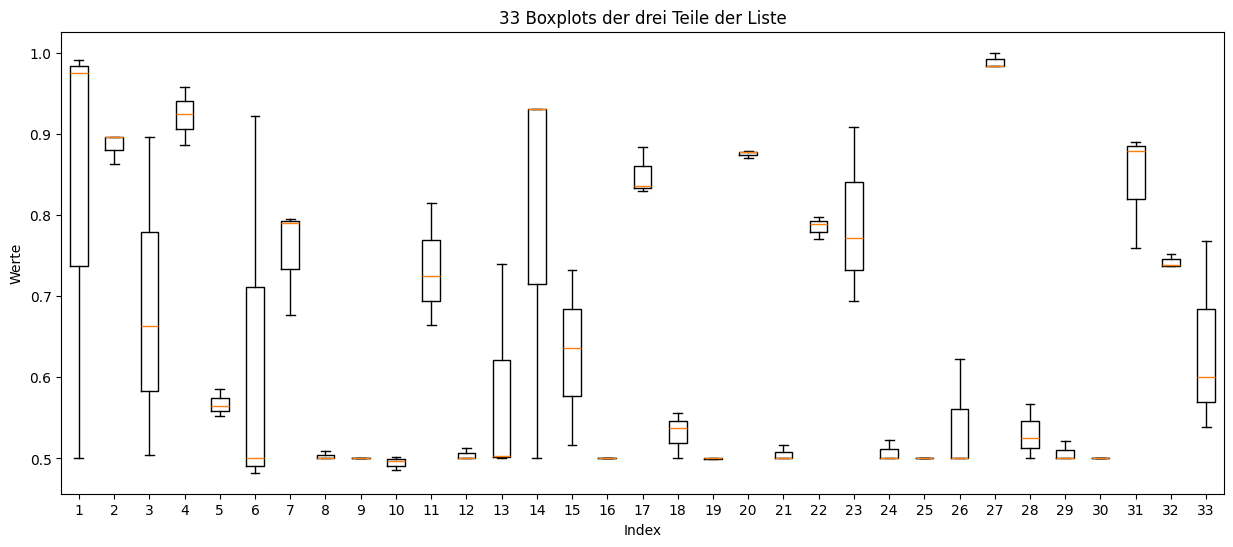

In [55]:
part1 = roc_all_ensamble[:33]
part2 = roc_all_ensamble[33:66]
part3 = roc_all_ensamble[66:]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([part1, part2, part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

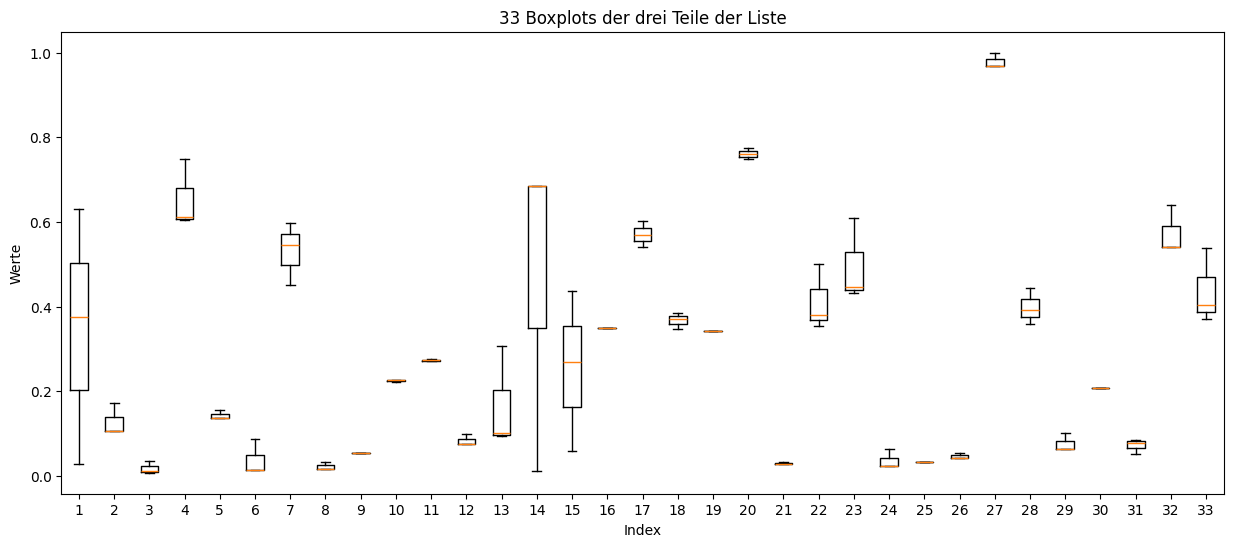

In [56]:
part1 = pr_all_ensamble[:33]
part2 = pr_all_ensamble[33:66]
part3 = pr_all_ensamble[66:]

# Zusammenfassen der Teile in ein 2D-Array
combined_data = np.array([part1, part2, part3])

# Erstellen der Boxplots
plt.figure(figsize=(15, 6))

# Erstellen von 33 Boxplots
plt.boxplot(combined_data)  # .T transponiert das Array, damit wir 33 Boxplots erhalten

# Titel und Achsenbeschriftungen hinzufügen
plt.title('33 Boxplots der drei Teile der Liste')
plt.xlabel('Index')
plt.ylabel('Werte')

# Plot anzeigen
plt.show()

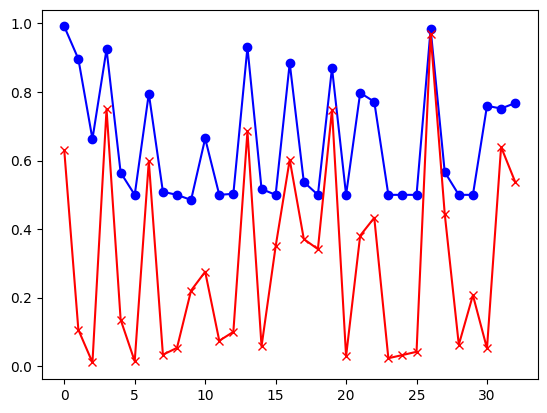

In [58]:
plt.plot(range(len(roc_all_ensamble[:33])), roc_all_ensamble[:33], marker='o', color='b')
plt.plot(range(len(pr_all_ensamble[:33])), pr_all_ensamble[:33], marker='x', color='r')
plt.show()

In [59]:
roc_all_ensamble_new_model = []
pr_all_ensamble_new_model = []
counter = 0
for file in medium_files:
    print(f'counter für die Anzhal der Files: {counter}')
    roc, pr = bagging_ensamble_training(file, 
                        random_seed=53,
                        percentage_labeld=0.05,
                        contrastiv_margin=10.0,
                        lr_siamese=0.0001,
                        lr_classifier=0.001,
                        epochs_siamese=20,
                        epochs_classifier=40,
                        print_embeddeds=False,
                        print_learning=False,
                        len_dataset=100000,
                        )
    
    roc_all_ensamble_new_model.append(roc)
    pr_all_ensamble_new_model.append(pr)
    counter += 1

counter für die Anzhal der Files: 0
##############Start Training with Dataset 26_optdigits.npz######################
----------------Start trainign Epoche 1 Siamese ----------------
----------------Start trainign Epoche 0----------------
Epoche: 0 Average Loss: 3169.09317492707
----------------Start trainign Epoche 1----------------
Epoche: 1 Average Loss: 2474.4809173818135
----------------Start trainign Epoche 2----------------
Epoche: 2 Average Loss: 1472.0316619482796
----------------Start trainign Epoche 3----------------
Epoche: 3 Average Loss: 724.8993296123222
----------------Start trainign Epoche 4----------------
Epoche: 4 Average Loss: 522.683522100034
----------------Start trainign Epoche 5----------------
Epoche: 5 Average Loss: 584.2755845013787
----------------Start trainign Epoche 6----------------
Epoche: 6 Average Loss: 624.0067907465084
----------------Start trainign Epoche 7----------------
Epoche: 7 Average Loss: 502.1936032034247
----------------Start trainign Epo

In [ ]:
plt.plot(range(len(roc_all_ensamble_new_model)), roc_all_ensamble_new_model, marker='o', color='b')
plt.plot(range(len(pr_all_ensamble_new_model)), pr_all_ensamble_new_model, marker='x', color='r')
plt.show()